In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Data Virtualizations

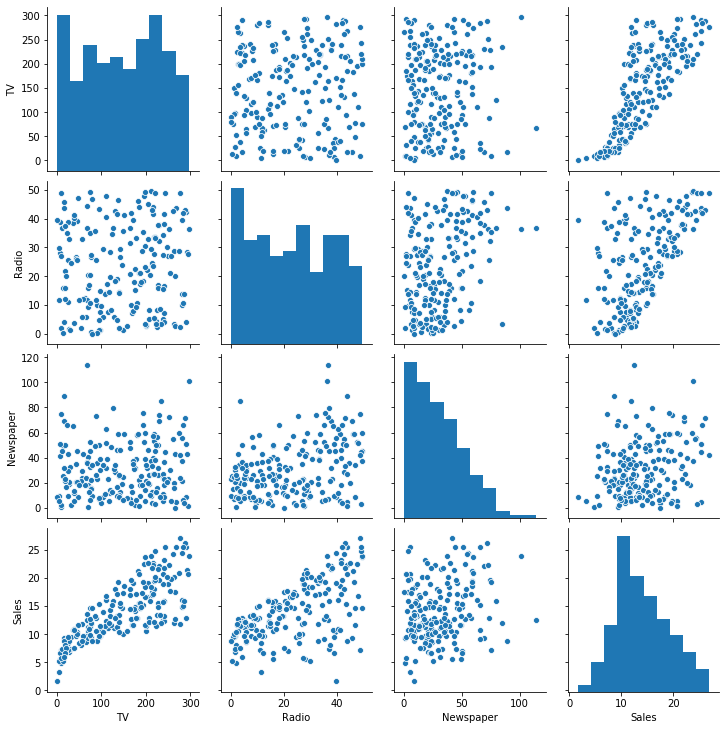

In [6]:
sns.pairplot(data)

/home/obed/anaconda3/envs/leon_ml/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


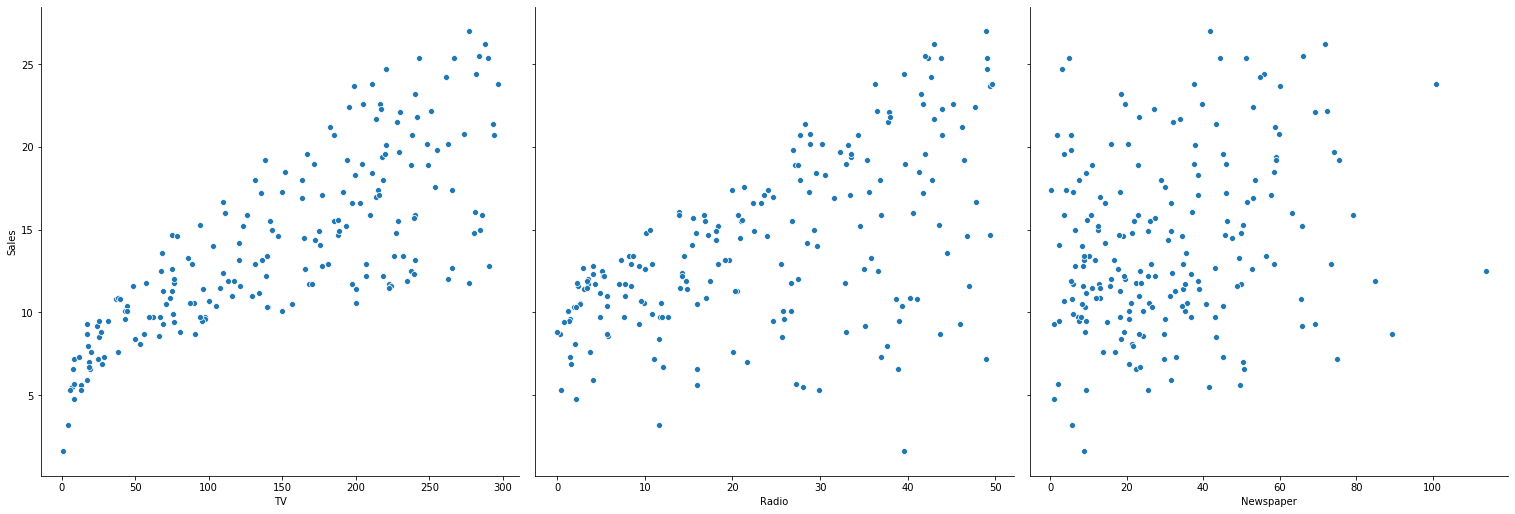

In [7]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=7, aspect=1)

Slitting the Data for Training and Testing

In [8]:
X = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100) 

In [10]:
#Performing Linear Regression
from sklearn.linear_model import LinearRegression

In [11]:
c1m = LinearRegression()

In [12]:
c1m.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [13]:
#model Evaluation
print(c1m.intercept_)

2.652789668879498


In [14]:
coeff_df = pd.DataFrame(c1m.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [15]:
y_pred = c1m.predict(X_test)

In [16]:
# Calculation for error terms
from sklearn.metrics import mean_absolute_error,r2_score
mse = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test,y_pred)

In [17]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', r_squared)

Mean_Squared_Error : 1.0638483124072025
r_square_value : 0.9058622107532246


In [30]:
import statsmodels.api as sm 
x_train_sm = X_train
x_train_sm= sm.add_constant(x_train_sm)
c1m_1 = sm.OLS(y_train,x_train_sm).fit()
c1m_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [19]:
print(c1m_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 11 May 2020   Prob (F-statistic):           9.97e-66
Time:                        03:28:20   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

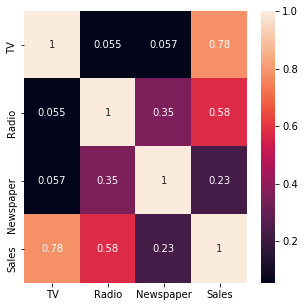

In [20]:
%matplotlib inline
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(),annot=True)

In [40]:
# Removing the Data from datasets # Newspaper
x_train_new = X_train[['TV', 'Radio']]
x_test_new = X_test[['TV', 'Radio']]

In [41]:
#building the model
c1m.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#Making Prediction
y_pred_new = c1m.predict(x_test_new)

In [43]:
print(y_pred_new)

[10.56198847 20.16735504 16.90186462 19.07993718 21.03892699 13.13621118
 11.80982028 12.39007729 20.59914742 21.04083466 10.88508869 19.38624121
  6.37517955 15.33164571  8.96088175  7.95144449 16.38791571 11.97017124
 17.24725749 11.20901475 17.11470022  9.70819803 20.79788275 17.20749366
 15.18035107 22.18189008 19.17555656 10.05518823 19.5883307  14.98424867
 14.39922454  7.65095995  9.84543862 14.78150095  7.22855505 13.69168479
  7.43358375 11.75347003 13.50004784 15.057806   17.06957807 13.68351323
 14.23222825 13.70744537 11.96487996  8.70898678 11.90028246 19.26409026
  9.01348371  5.17060846 16.23196722 18.16063096 12.87565806 16.92691617
 17.99125313 12.31004629  4.29140991 11.39172539 16.20134352 13.51229884]


Text(0, 0.5, 'Sales')

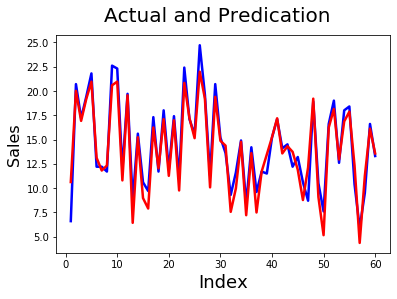

In [44]:
#Visualize Actual Vs Prediction data
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred,color='red', linewidth=2.5, linestyle='-')
fig.suptitle("Actual and Predication", fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

Text(0, 0.5, 'Sales')

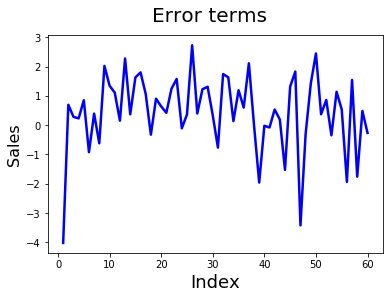

In [45]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle("Error terms", fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

In [46]:
from sklearn.metrics import mean_absolute_error,r2_score
mse = mean_absolute_error(y_test, y_pred_new)
r_squared = r2_score(y_test,y_pred_new)

In [47]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', r_squared)

Mean_Squared_Error : 1.0397500099187897
r_square_value : 0.909216449171822


In [52]:
import statsmodels.api as sm 
x_train_final = X_test
x_train = sm.add_constant(x_train_final)
c1m_final = sm.OLS(y_train,x_train_final).fit()


ValueError: The indices for endog and exog are not aligned

In [53]:
from sklearn

SyntaxError: invalid syntax (<ipython-input-53-9bacd0769f04>, line 1)